## Required Libraries

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import statsmodels.formula.api as smf

### Loading the Data

In [ ]:
merged_data = pd.read_csv('/data/cleaned/merged_eu_health_data.csv')
# merged_data.head()

## **Analysis of Factors Affecting Life Expectancy**


#### Research questions 
*Is there a statistically significant relationship between health spending and life expectancy in EU countries over time?*

### Inspect the Data 

In [49]:
merged_data.info()
merged_data.isnull().sum()
merged_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152307 entries, 0 to 152306
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         152307 non-null  int64  
 1   Country Code       152307 non-null  object 
 2   Country Name       152307 non-null  object 
 3   Year               152307 non-null  int64  
 4   Spending Unit      152307 non-null  object 
 5   Financing Code     152307 non-null  object 
 6   Category           152307 non-null  object 
 7   Spending           152307 non-null  float64
 8   Gender             152307 non-null  object 
 9   Age Class          152307 non-null  object 
 10  Life Expectancy    152307 non-null  float64
 11  Type of Mortality  152307 non-null  object 
 12  Diseas             152307 non-null  object 
 13  Mortality Rate     152307 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 16.3+ MB


,Unnamed: 0,Year,Spending,Life Expectancy,Mortality Rate
count,152307.000000,152307.000000,152307.000000,152307.000000,152307.000000
mean,76153.000000,2017.198960,547.863881,78.390890,197.180124
std,43967.388062,3.094793,1262.208507,4.049032,149.802032
min,0.000000,2012.000000,0.000000,64.100000,33.120000
25%,38076.500000,2015.000000,0.000000,76.300000,90.170000
50%,76153.000000,2017.000000,47.290000,79.100000,158.310000
75%,114229.500000,2020.000000,471.660000,81.300000,240.900000
max,152306.000000,2022.000000,10374.050000,86.700000,1000.630000


### Visual Exploration 

Visualize the potential correlation:

<Figure size 1000x600 with 0 Axes>

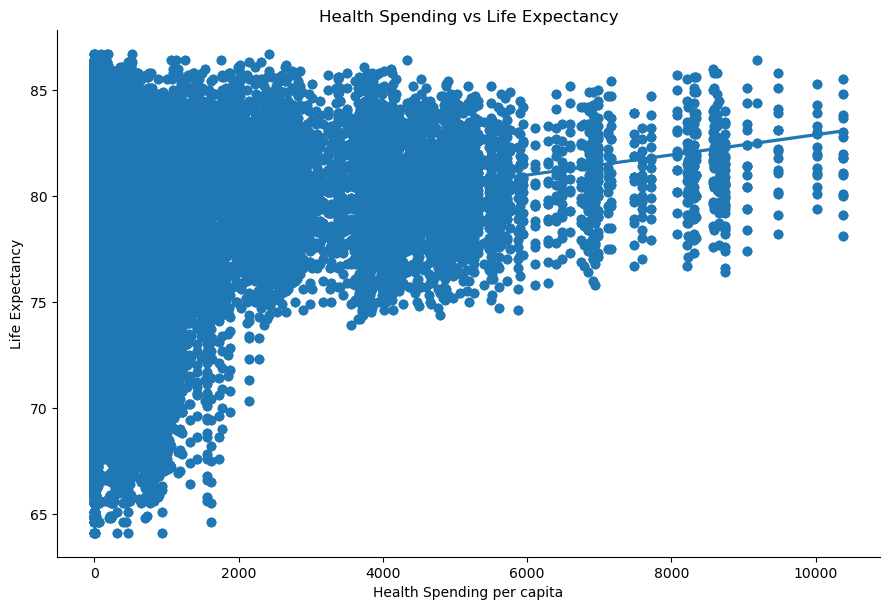

In [50]:
## regression Line

plt.figure(figsize=(10, 6))
sns.lmplot(data=merged_data, x= 'Spending', y='Life Expectancy', height=6, aspect=1.5)
plt.title('Health Spending vs Life Expectancy')
plt.xlabel('Health Spending per capita')
plt.ylabel('Life Expectancy')
plt.show()

### Correlation Analysis
 Pearson correlation for linear trends

In [51]:
corr = merged_data[['Spending', 'Life Expectancy']].corr
print(corr)


<bound method DataFrame.corr of         Spending  Life Expectancy
0        1678.79             82.8
1        1678.79             82.8
2        1678.79             82.8
3        1678.79             81.9
4        1678.79             81.9
...          ...              ...
152302    998.98             73.2
152303    998.98             73.2
152304    998.98             76.7
152305    998.98             76.7
152306    998.98             76.7

[152307 rows x 2 columns]>


### Linear Regression

In [52]:
reg_data = merged_data[['Spending', 'Life Expectancy']].dropna()

## Defining the dependent and independent variables
x = reg_data['Spending']
y = reg_data['Life Expectancy']


x = sm.add_constant(x)    # Adding Constant to the model

reg_model = sm.OLS(y, x).fit()

reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3421.
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:33:35   Log-Likelihood:            -4.2742e+05
No. Observations:              152307   AIC:                         8.548e+05
Df Residuals:                  152305   BIC:                         8.549e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.1304      0.011   6985.043      0.000      78.108      78.152
Spending       0.0005   8.13e-06     58.489      0.000       0.000       0.000
==============================================================================
Omnibus:                    12070.095   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15130.003
Skew:                          -0.759   Prob(JB):                         0.00
Kurtosis:                       3.278   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualize the relations and check the Distribution and Outliers

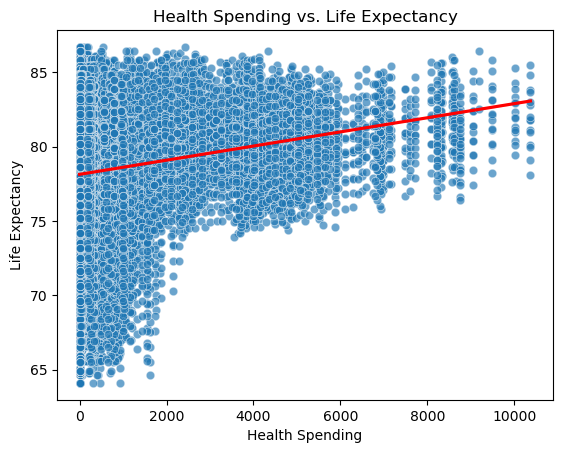

In [53]:
sns.scatterplot(data= merged_data, x='Spending', y = 'Life Expectancy', alpha=0.3)
sns.regplot(data=merged_data, x='Spending', y='Life Expectancy', scatter=False, color='red')
plt.title('Health Spending vs. Life Expectancy')
plt.xlabel('Health Spending')
plt.show()

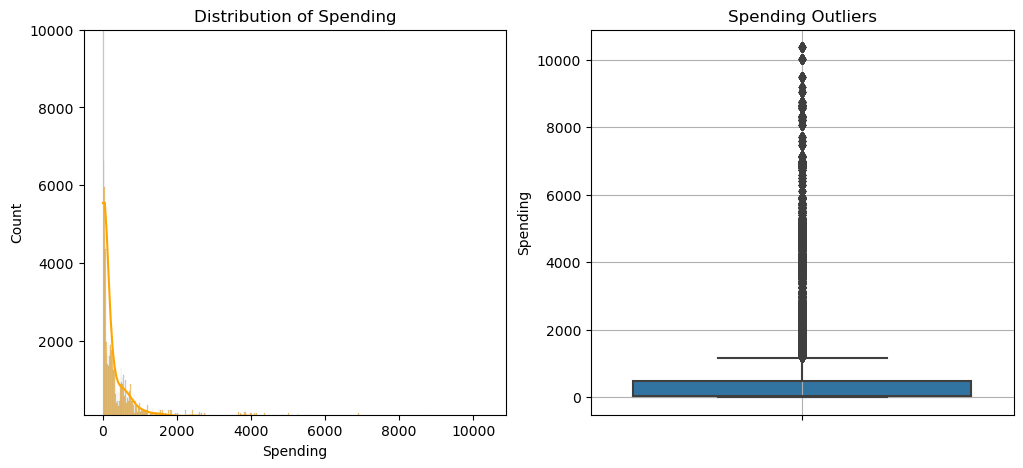

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(merged_data['Spending'], kde=True, ax=axes[0], color='Orange')
axes[0].set_title('Distribution of Spending')
axes[1].grid(True)
axes[0].set_ylim(100, 10000)

sns.boxplot(y=merged_data['Spending'], ax=axes[1])
axes[1].set_title('Spending Outliers')
axes[1].grid(True)
plt.show()

### Ckeck for Correlation and Multicollinearity

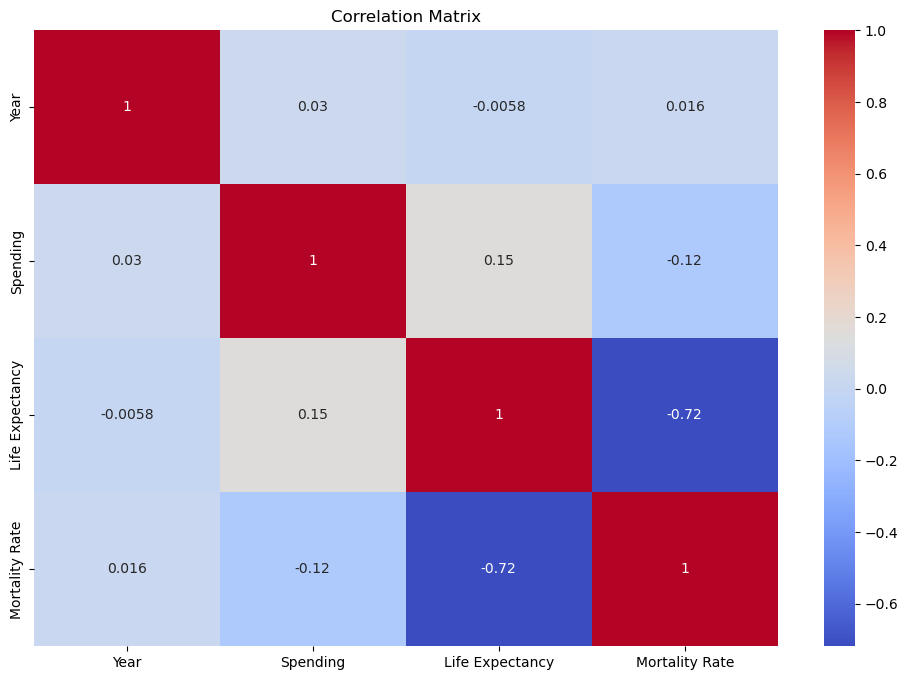

In [55]:
merged_data.drop(columns=['Unnamed: 0'], inplace=True)
corr = merged_data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

####  Detect multicollinearity (**Variance Inflation Factor (VIF)**)

In [56]:
# Define more predictors
x = merged_data[['Spending', 'Year', 'Age Class', 'Gender']]

# Turn the categorical variables into dummy variables
x = pd.get_dummies(x, drop_first=True).astype(int)
x = x.dropna()


# Calculate VIF
vif = pd.DataFrame()
vif['features'] = x.columns
vif['VIF'] =  [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

                     features       VIF
0                    Spending  0.002147
1                        Year  0.014822
2           Age Class_2 years  1.999988
3           Age Class_3 years  1.999988
4           Age Class_4 years  1.999988
5  Age Class_Less than 1 year  2.003848
6                    Gender_M  1.999993
7                    Gender_T  1.999993


No multicollinearity found in Spending variable, 
and a very low multicollinearity at an acceptable rate in the other predictors.

### Fit the Multivariates OLS model 

In [57]:

# Define the independent variables and the target
X = pd.get_dummies(merged_data[['Spending', 'Year', 'Age Class', 'Gender']], drop_first=True).astype(int) # use drop_first to avoid dummy variable trap

X = sm.add_constant(X)  # add constant for intercept
y = merged_data['Life Expectancy']

# Drop missing values (if any)
X = X.loc[y.notnull()]
y = y.loc[y.notnull()]

# Fit OLS regression
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary2())

                        Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.439      
Dependent Variable:      Life Expectancy     AIC:                   770252.5068
Date:                    2025-08-14 13:33    BIC:                   770341.9097
No. Observations:        152307              Log-Likelihood:        -3.8512e+05
Df Model:                8                   F-statistic:           1.489e+04  
Df Residuals:            152298              Prob (F-statistic):    0.00       
R-squared:               0.439               Scale:                 9.2009     
-------------------------------------------------------------------------------
                            Coef.   Std.Err.     t     P>|t|   [0.025   0.975] 
-------------------------------------------------------------------------------
const                      110.2010   5.0683   21.7430 0.0000 100.2672 120.1349
Spending                     0.0005   0.0000   77.2191 0.0000   

In [ ]:
# Get summary as DataFrame
summary = model.summary2().tables[1].reset_index()
summary.columns = ['Variable', 'Coefficient', 'StdErr', 't', 'P_Value', 'Lower_CI', 'Upper_CI']

# Add 'Significant' flag
summary['Significant'] = np.where(summary['P_Value'] < 0.05, 'Yes', 'No')
# summary

# Optional categorization
def categorize(var):
    if 'Gender' in var:
        return 'Gender'
    elif 'Age Class' in var:
        return 'Age Class'
    elif 'Spending' in var or 'Healthcare' in var:
        return 'HealthCare Spending'
    elif 'Year' in var:
        return 'Time'
    elif var == 'const':
        return 'Intercept'
    else:
        return 'Other'

summary['Category'] = summary['Variable'].apply(categorize)



# Export the output
summary.to_csv("reports/multi_regression_results.csv", index=False)


#### Fit Multivariate Regression Model with ``Interaction terms``

In [59]:
# make the data smaller
data_small = merged_data[['Country Name','Life Expectancy','Year', 'Age Class', 'Gender', 'Spending']].copy()
data_small.rename(columns={'Country Name': 'Country', 'Life Expectancy' : 'life_expectancy', 'Age Class': 'age_class'}, inplace=True)

data_small = data_small.dropna()

# Convert large float and integer number to smaller version to save memory
data_small['life_expectancy'] = pd.to_numeric(data_small['life_expectancy'], downcast='float')
data_small['Spending'] = pd.to_numeric(data_small['Spending'], downcast='float')
data_small['Year'] = pd.to_numeric(data_small['Year'], downcast='integer')
# data_small['age_class'] = pd.to_numeric(data_small['age_class'], downcast='integer')

#encode gender
data_small['gender_encoded'] = data_small['Gender'].map({'M': 0, 'F': 1, 'T':2})
data_small['age_encoded'] = data_small['age_class'].map({'Less than 1 year': 0, '1 year':1, '2 years': 2, '3 years':3, '4 years':4})

# create the interaction term    
data_small['gender_spending'] = data_small['gender_encoded'] * data_small['Spending']
data_small['age_year'] = data_small['Year'] * data_small['age_class']
data_small['age_spending'] = data_small['age_encoded'] * data_small['Spending']
data_small['year_spending'] = data_small['Year'] * data_small['Spending']


In [60]:
model2 = smf.ols('life_expectancy ~ Year + C(age_class) + C(Gender) + Spending + C(Gender):Spending', data=data_small).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                 1.198e+04
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:33:56   Log-Likelihood:            -3.8493e+05
No. Observations:              152307   AIC:                         7.699e+05
Df Residuals:                  152296   BIC:                         7.700e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          110.2770      5.062     21.784      0.000     100.355     120.199
C(age_class)[T.2 years]             -0.9818      0.025    -39.978      0.000      -1.030      -0.934
C(age_class)[T.3 years]             -1.9699      0.025    -80.214      0.000      -2.018      -1.922
C(age_class)[T.4 years]             -2.9596      0.025   -120.512      0.000      -3.008      -2.911
C(age_class)[T.Less than 1 year]     0.7418      0.025     30.237      0.000       0.694       0.790
C(Gender)[T.M]                      -5.6742      0.021   -273.727      0.000      -5.715      -5.634
C(Gender)[T.T]                      -2.8016      0.021   -135.150      0.000      -2.842      -2.761
Year                                -0.0140      0.003     -5.588      0.000      -0.019      -0.009
Spending                             0.0003   1.07e-05     31.068      0.000       0.000       0.000
C(Gender)[T.M]:Spending              0.0003   1.51e-05     19.292      0.000       0.000       0.000
C(Gender)[T.T]:Spending              0.0001   1.51e-05      9.519      0.000       0.000       0.000
==============================================================================
Omnibus:                    14016.226   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17859.796
Skew:                          -0.829   Prob(JB):                         0.00
Kurtosis:                       2.746   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Regression Results – Base + Interaction Term

**Key Findings:**

R² = 0.440 → 44% of life expectancy variation is explained by the model.

Gender (Male) is associated with -5.6742 years lower life expectancy, controlling for other factors.

Spending has a small but statistically significant positive relationship with life expectancy.

The Gender × Spending interaction term is negative, suggesting that spending benefits are smaller for some genders.

In [ ]:

reg2_results = pd.DataFrame({
    "Variable": model2.params.index,
    "Coefficient": model2.params.values,
    "Std. Error": model2.bse.values,
    "p-value": model2.pvalues.values,
    "CI Lower": model2.conf_int()[0].values,
    "CI Upper": model2.conf_int()[1].values
})


reg2_results.to_csv("/reports/regression_results_model2.csv", index=False)
# reg_results


#### Check For Heteroscedasticity

In [62]:

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

#Residuals and Design matrix used by the model
resid = model2.resid
exog = model2.model.exog 

# Breusch-Pagan test 
bp_test = het_breuschpagan(resid, exog)
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = bp_test
print("Breusch-Pagan LM p-value:", bp_lm_pvalue)
print("Breusch-Pagan F-test p-value:", bp_f_pvalue)


Breusch-Pagan LM p-value: 0.0
Breusch-Pagan F-test p-value: 0.0


The Breusch-Pagan test shows that Homoscedasticity is rejected. Therefore, the model hass Heteroscedasticity, 
which affects the validity of standard errors, t-tests, and p-values.

### Refit / report robust standard errors

In [63]:
# HC3 robust standard errors
robust_model2 = smf.ols('life_expectancy ~ Year + C(age_class) + C(Gender) * Spending', 
                        data=data_small).fit(cov_type='HC3')
print(robust_model2.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                 1.475e+04
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:33:57   Log-Likelihood:            -3.8493e+05
No. Observations:              152307   AIC:                         7.699e+05
Df Residuals:                  152296   BIC:                         7.700e+05
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

The coefficients are the same as before, but the standard errors have been adjusted to be valid even in the presence of heteroskedasticity.

The p-values are still <0.05 for all predictors, heteroskedasticity did not reverse any significance conclusions.

*Condition Number Warning (1.41e+06)* is high, predictors are highly correlated.

*Durbin-Watson (0.007)* is very low, meaning strong positive autocorrelation in residuals.


####  Centering numeric variables to reduce multicollinearity

In [64]:
import statsmodels.formula.api as smf

# Center/standardize Numeric variables
data_small['Year_centered'] = data_small['Year'] - data_small['Year'].mean()
data_small['Spending_centered'] = data_small['Spending'] - data_small['Spending'].mean()

model2_c = smf.ols(
    'life_expectancy ~ C(age_class) + C(Gender) + Year_centered + Spending_centered + C(Gender):Spending_centered',
    data=data_small).fit()

# Fit with cluster-robust SEs 
model_cluster = smf.ols(
    'life_expectancy ~ C(age_class) + C(Gender) + Year_centered + Spending_centered + C(Gender):Spending_centered',
    data=data_small
).fit(
    cov_type='cluster',
    cov_kwds={'groups': data_small['Country']}
)

print(model_cluster.summary())


                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                 6.639e+05
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           4.11e-82
Time:                        13:34:03   Log-Likelihood:            -3.8493e+05
No. Observations:              152307   AIC:                         7.699e+05
Df Residuals:                  152296   BIC:                         7.700e+05
Df Model:                          10                                         
Covariance Type:              cluster                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

### Multicollinearity diagnostics (VIF) after Centring Numeric variables

In [65]:
# Build a DataFrame of the model's exogenous variables
X = pd.DataFrame(model_cluster.model.exog, columns=model_cluster.model.exog_names)

# drop Const for VIF calculation
if 'const' in X.columns:
    X_vif = X.drop(columns=['const'])
else:
    X_vif = X.copy()

vif_df = pd.DataFrame()
vif_df['variable'] = X_vif.columns
vif_df['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_df.sort_values('VIF', ascending=False))

                            variable       VIF
0                          Intercept  7.003845
8                  Spending_centered  3.000909
10  C(Gender)[T.T]:Spending_centered  2.000000
9   C(Gender)[T.M]:Spending_centered  2.000000
4   C(age_class)[T.Less than 1 year]  1.601848
3            C(age_class)[T.4 years]  1.600307
1            C(age_class)[T.2 years]  1.600307
2            C(age_class)[T.3 years]  1.600307
5                     C(Gender)[T.M]  1.333333
6                     C(Gender)[T.T]  1.333333
7                      Year_centered  1.000911


`Intercept (VIF = 7.00)` – Slightly higher than the others because the intercept absorbs correlation between predictors even after centering; not a problem since it’s below the common threshold of 10.

`Spending_centered (VIF ≈ 3.00)` – Mild correlation with other predictors, but far below concern thresholds (>5 or >10).

`Interaction terms (VIF = 2.00)` – Low multicollinearity between interaction terms and other predictors.

`Age class categories (VIF ≈ 1.60)` – Very low correlation between age categories.

`Gender dummies (VIF = 1.33)` – Minimal correlation with other predictors.

`Year_centered (VIF ≈ 1.00)` – Essentially uncorrelated with other predictors after centering.

*Conclusion:* All VIF values are well within safe limits (<5), indicating no harmful multicollinearity after centering ``Year`` and ``Spending``.

### Residual Diagnosis

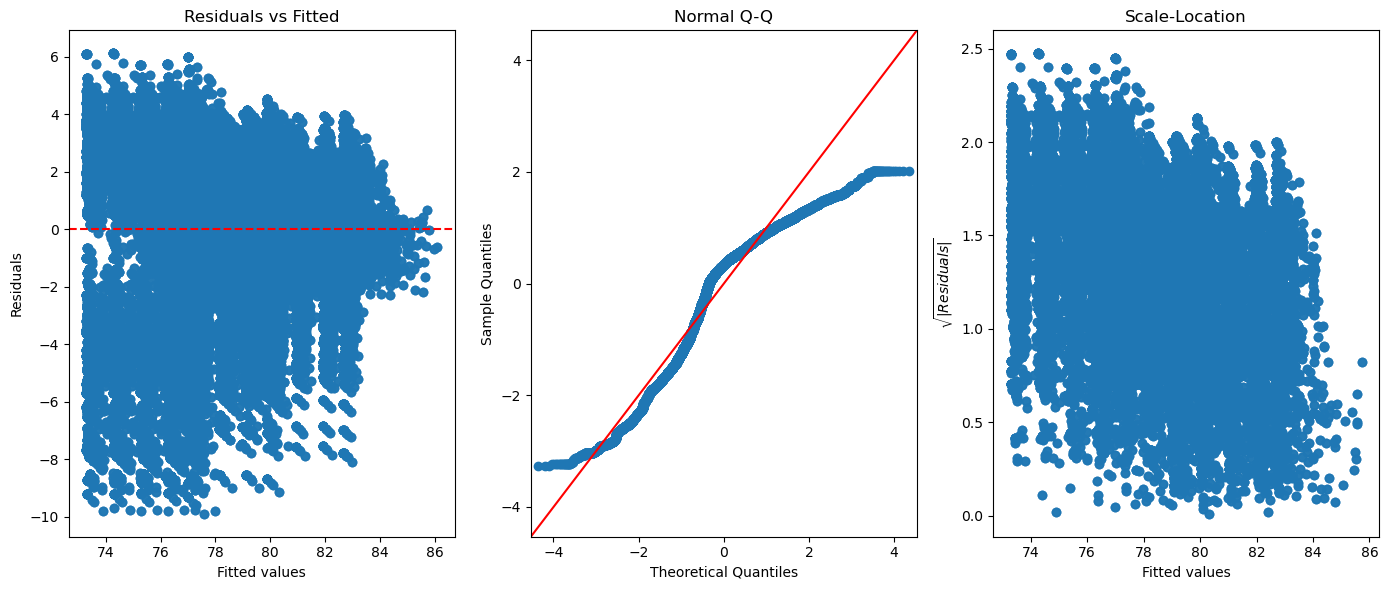

In [68]:
#  Step 2: Diagnostic plots 
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Residuals vs Fitted
fitted_vals = model2.fittedvalues
residuals = model2.resid
axes[0].scatter(fitted_vals, residuals, alpha=0.7)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title("Residuals vs Fitted")
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Residuals")

# Normal Q-Q plot
sm.qqplot(residuals, line='45', fit=True, ax=axes[1])
axes[1].set_title("Normal Q-Q")

# Scale-Location plot
axes[2].scatter(fitted_vals, abs(residuals**0.5), alpha=0.7)
axes[2].set_title("Scale-Location")
axes[2].set_xlabel("Fitted values")
axes[2].set_ylabel(r"$\sqrt{|Residuals|}$")


plt.tight_layout()
plt.show()


``Residuals vs Fitted:`` Checks linearity and whether residuals are centered around zero.

Here, there is some pattern in the spread (narrower at higher fitted values), suggesting potential *heteroscedasticity*.


``Normal Q-Q Plot:`` Assesses whether residuals follow a normal distribution.

Deviations at the tails indicate that residuals are not perfectly normal, with heavier tails than expected.


``Scale-Location Plot:`` Another check for homoscedasticity (equal variance).

The residual spread changes with fitted values, again suggesting *heteroscedasticity*.